In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
class IdealGas:

    def __init__(self, nparticles, mass, radius, xlim, ylim, t):
        
        self.nparticles = nparticles #number of particles 
        self.mass = mass #mass of particles 
        self.radius = radius #radius of particles 
        self.xlim = xlim
        self.ylim = ylim 
        self.A = (xlim[1]- xlim[0])*(ylim[1]-ylim[0])
        self.t = t #array of times for the animation
        self.dt = t[1]-t[0]

        self.r = np.stack((np.random.uniform(*xlim, nparticles), 
                           np.random.uniform(*ylim, nparticles))).reshape((nparticles,2))
        
        
    def dist_pairs(self):



    def step(self): 
        """1) check wall collisions and update the velocities for the particles in question
        2) check particle collisions and update the velocities. 
        3) step the positions"""

    
        #step the positions
        self.r += self.v*self.dt






    
        




In [12]:
nparticles = 5
mass = 1
radius = 0.05
xlim = [0,1]
ylim = [0,1]
t = np.linspace(0,10,100)
gas = IdealGas( nparticles, mass, radius, xlim, ylim, t)

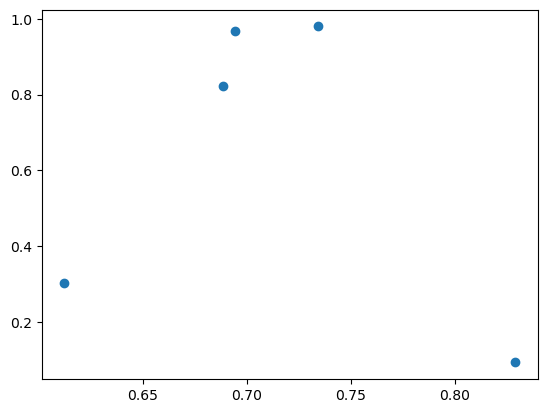

In [20]:
plt.scatter(gas.r[:,0], gas.r[:,1])